Double Exponential Smoothing
    to identify both a level and a trend
    level(a) = avg value around which demand changes over time
    trend (b)= avg variation of the level btw two consecutive periods

Model:
    a(t) = alpha*demand(t) + (1-alpha)*(a(t-1) + b(t-1)) = level estimation
    b(t) = beta*(a(t) - a(t-1)) + (1-beta)*b(t-1) = trend estimation

    f(t+1) = a(t) + b(t)
    f(t+lambda) = a(t) + lambda*b(t)

Future Forecast:
    trend stays constant, so it extrapolates the latest trend forever
    




    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

In [2]:
def double_exp_smoothing(demand, future_periods=1, alpha=0.4, beta=0.4):
    columns = len(demand)
    demand =np.append(demand, [np.nan]*future_periods)
    forecast,a,b = np.full((3,columns+future_periods),np.nan)
    
    #initialization
    a[0] = demand[0]
    b[0] = demand[1] - demand[0]
    
    for t in range(1,columns):
        forecast[t] = a[t-1] + b[t-1]
        a[t] = alpha*demand[t] + (1-alpha)*(a[t-1]+b[t-1])
        b[t] = beta*(a[t]-a[t-1]) + (1-beta)*b[t-1]
        
    # for future periods
    for t in range(columns,columns+future_periods):
        forecast[t] = a[t-1] + b[t-1]
        a[t] = forecast[t]
        b[t] = b[t-1]
        
    df = pd.DataFrame.from_dict({'Demand':demand,'Forecast':forecast,'Level':a,'Trend':b, 'Error':demand-forecast})     
    return df
        

In [4]:
d = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,10,12]
df = double_exp_smoothing(d, future_periods=4)

In [5]:
def kpi3(df):
    average_demand = df.loc[df['Error'].notnull(),'Demand'].mean()
    print(f"average demand: {average_demand}")
    bias = df['Error'].mean()
    scaled_bias = bias/average_demand
    print('Bias: {:0.2f},{:.2%}'.format(bias,scaled_bias))
    
    MAE = df['Error'].abs().mean()
    scaled_MAE = MAE/average_demand
    print('MAE: {:0.2f}, {:.2%}'.format(MAE,scaled_MAE))
    
    RMSE = np.sqrt((df['Error']**2).mean())
    scaled_RMSE = RMSE/average_demand
    print('RMSE: {:0.2f}, {:.2%}'.format(RMSE,scaled_RMSE))

In [6]:
kpi3(df)

average demand: 14.9
Bias: 2.64,17.71%
MAE: 4.38, 29.40%
RMSE: 6.26, 42.02%


<Axes: xlabel='Period'>

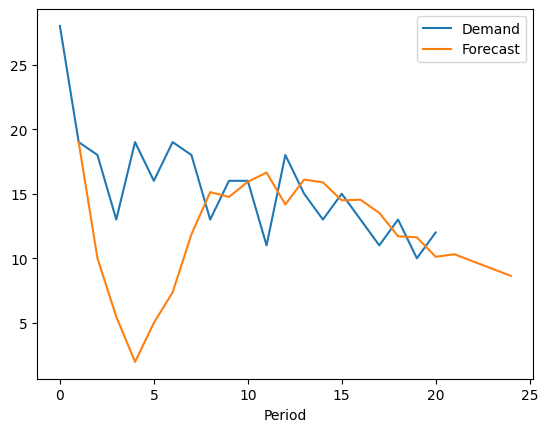

In [7]:
df.index.name = 'Period'
df[['Demand','Forecast']].plot()